In [1]:
import moxing as mox
import os
mox.file.shift('os', 'mox')

INFO:root:Using MoXing-v1.15.1-3fc51aac
INFO:root:Using OBS-Python-SDK-3.1.2


In [2]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import cv2

INFO:matplotlib.font_manager:font search path ['/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf', '/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/afm', '/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
INFO:matplotlib.font_manager:generated new fontManager


# Step1:
 divide the EEMD trend of that spatial location by the standard deviation of the corresponding wscfa data

In [3]:
restrend = np.load('obs://ltsa-eemd/IMFs4_trend/IMFs4_trend.npy')

In [8]:
restrend.shape

(52, 720, 720)

In [9]:
std_wscfa = np.std(restrend,axis=0)

In [10]:
std_wscfa.shape

(720, 720)

In [11]:
normalized_trend = np.zeros((52,720,720))
for i in range(52):
    normalized_trend[i] = np.divide(restrend[i],std_wscfa)

/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
normalized_trend.shape

(52, 720, 720)

In [13]:
# normalized_trend0 = np.nan_to_num(normalized_trend)

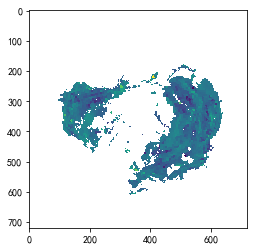

In [14]:
plt.imshow(normalized_trend[1])

not nan index to filter

In [15]:
not_nan_index = np.where((~np.isnan(normalized_trend[10]))==True)

In [16]:
not_nan_index

(array([179, 179, 179, ..., 609, 609, 609]),
 array([509, 510, 511, ..., 333, 334, 335]))

In [17]:
t = np.arange(1966,2019)

In [18]:
for i,year in enumerate(t):
    print(i,year)

0 1966
1 1967
2 1968
3 1969
4 1970
5 1971
6 1972
7 1973
8 1974
9 1975
10 1976
11 1977
12 1978
13 1979
14 1980
15 1981
16 1982
17 1983
18 1984
19 1985
20 1986
21 1987
22 1988
23 1989
24 1990
25 1991
26 1992
27 1993
28 1994
29 1995
30 1996
31 1997
32 1998
33 1999
34 2000
35 2001
36 2002
37 2003
38 2004
39 2005
40 2006
41 2007
42 2008
43 2009
44 2010
45 2011
46 2012
47 2013
48 2014
49 2015
50 2016
51 2017
52 2018


# Function of step2 and step3

In [19]:
def sigtest(year):
    path = 'obs://ltsa-eemd/significance-test/noise_trend/'+str(year)+'/'
    filename = mox.file.list_directory(path, recursive=True)
    
    
    ##### step2 #####
    # noise trend read from file
    noise_trend = np.zeros((len(filename),720,720))
    for i in range (len(filename)):
        noise_trend[i]  = np.load(path+filename[i])
    print('noise trend of this year loaded')
    
    # std and mean of noise trend
    std = np.std(noise_trend,axis = 0)
    mean = np.mean(noise_trend,axis = 0)
    
    # mean+-2*std
    lower = mean-2*std
    upper = mean+2*std
    
    
    ##### step3 #####
    # load normalized real trend
    nor_trend = normalized_trend[year-1966]
    
    # check if normalized trend is in range of 2 std
    sig = ((nor_trend >= upper) | (nor_trend <=lower))
    
    # filter the significant trend
    sig_trend = restrend[year-1966]*sig
    print('significant trend generated')
    
    # save
    np.save('obs://ltsa-eemd/significance-test/significance/'+'sig_trend_'+str(year)+'.npy',sig_trend)
    print('sig_trend saved')

In [21]:
sigtest(1973)

noise trend of this year loaded
significant trend generated
sig_trend saved


/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater_equal
/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less_equal


In [22]:
sigtrend1973 = np.load('obs://ltsa-eemd/significance-test/significance/'+'sig_trend_1973.npy')

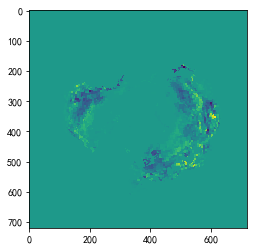

In [23]:
plt.imshow(sigtrend1973)

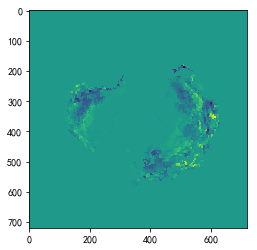

In [25]:
plt.imshow(restrend[1973-1966])

In [26]:
val = (restrend[1973-1966]==sigtrend1973)

In [27]:
np.unique(val,return_counts=True)

(array([False,  True]), array([ 14127, 504273]))

In [28]:
for year in [1980,1990,2000,2010]:
    sigtest(year)
    stryear = str(year)
    print('year %s done'%stryear)

noise trend of this year loaded


/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater_equal
/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less_equal


significant trend generated
sig_trend saved
year 1980 done
noise trend of this year loaded
significant trend generated
sig_trend saved
year 1990 done
noise trend of this year loaded
significant trend generated
sig_trend saved
year 2000 done
noise trend of this year loaded
significant trend generated
sig_trend saved
year 2010 done


In [29]:
sigtest(2017)

noise trend of this year loaded
significant trend generated
sig_trend saved


/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in greater_equal
/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less_equal


# Step2:
 find the two-standard-deviation spread value of the trends of the red noise series having the same lag-1 auto-correlation as the corresponding wscfa data

2000

In [16]:
path = 'obs://ltsa-eemd/significance-test/noise_trend/2000/'

In [17]:
filename = mox.file.list_directory('obs://ltsa-eemd/significance-test/noise_trend/2000/', recursive=True)

In [18]:
len(filename)

500

In [19]:
filename[0]

'trend2000_0.npy'

In [20]:
noise_trend_2000 = np.zeros((len(filename),720,720))
for i in range (len(filename)):
    noise_trend_2000[i]  = np.load(path+filename[i])

In [21]:
# noise_trend_1973 = np.zeros((len(filename),720,720))
# ksize = (9,9)
# for i in range (len(filename)):
#     image = np.load(path+filename[i])
#     noise_trend_1973[i] = cv2.blur(image, ksize)

In [22]:
noise_trend_2000.shape

(500, 720, 720)

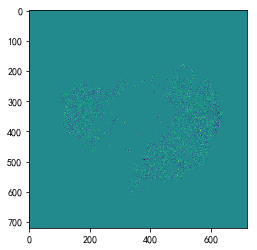

In [23]:
plt.imshow(noise_trend_2000[0])

(array([ 3.,  6., 14., 16., 29., 32., 45., 66., 69., 60., 50., 31., 25.,
        23., 16.,  6.,  4.,  1.,  2.,  2.]),
 array([-0.9082881 , -0.80134831, -0.69440851, -0.58746872, -0.48052892,
        -0.37358913, -0.26664933, -0.15970954, -0.05276974,  0.05417005,
         0.16110985,  0.26804964,  0.37498944,  0.48192923,  0.58886903,
         0.69580882,  0.80274862,  0.90968841,  1.01662821,  1.123568  ,
         1.2305078 ]),
 <a list of 20 Patch objects>)

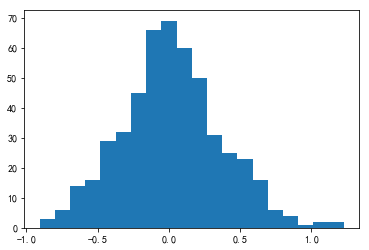

In [24]:
plt.hist(noise_trend_2000[:,179,509],20)

2000

In [25]:
# path = 'obs://ltsa-eemd/significance-test/noise_trend/1990/'

In [26]:
# filename = mox.file.list_directory('obs://ltsa-eemd/significance-test/noise_trend/1990/', recursive=True)

In [27]:
# len(filename)

In [28]:
# filename[0]

In [29]:
# noise_trend_1990 = np.zeros((len(filename),720,720))
# for i in range (len(filename)):
#     noise_trend_1990[i]  = np.load(path+filename[i])

In [30]:
# noise_trend_1973 = np.zeros((len(filename),720,720))
# ksize = (9,9)
# for i in range (len(filename)):
#     image = np.load(path+filename[i])
#     noise_trend_1973[i] = cv2.blur(image, ksize)

In [31]:
# noise_trend_1990.shape

In [32]:
# plt.figure(figsize=(8,5))
# plt.subplot(1,2,1)
# plt.hist(noise_trend_1990[:,179,509],20)
# plt.title('PDF for 1990')
# plt.subplot(1,2,2)
# plt.hist(noise_trend_2000[:,179,509],20)
# plt.title('PDF for 2000')
# plt.savefig('pdf.png',dpi = 300)

### stand d

In [33]:
std = np.std(noise_trend_2000,axis = 0)

In [34]:
std.shape

(720, 720)

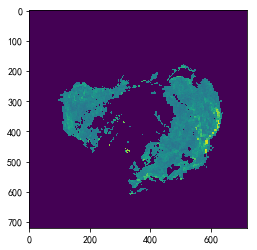

In [35]:
plt.imshow(std)

In [36]:
mean = np.mean(noise_trend_2000,axis = 0)

In [37]:
mean.shape

(720, 720)

the lower bound

In [38]:
lower = mean-2*std

In [39]:
lower.shape

(720, 720)

the upper bound

In [40]:
upper = mean+2*std

# Step 3:
 check whether the trend value is beyond the two-standard-deviation level (slightly larger than 95% of confidence) of the noise EEMD trend PDF at the given temporal location. 

In [41]:
nor_trend_2000 = normalized_trend[34]

In [42]:
sig = ((nor_trend_2000 >= upper) | (nor_trend_2000 <=lower))

/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.


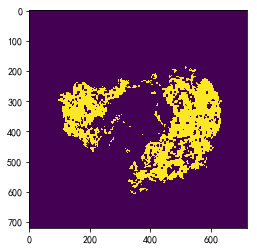

In [43]:
plt.imshow(sig)

In [36]:
sigupper = nor_trend_2000 > upper


/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


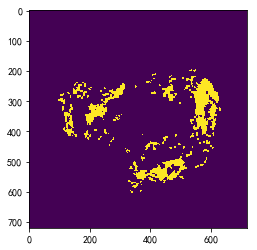

In [37]:
plt.imshow(sigupper)

In [38]:
siglower = nor_trend_2000 <lower

/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


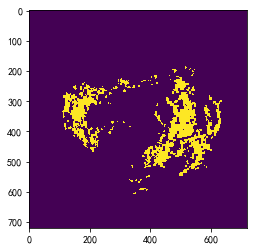

In [39]:
plt.imshow(siglower)

In [40]:
sig = sigupper+siglower

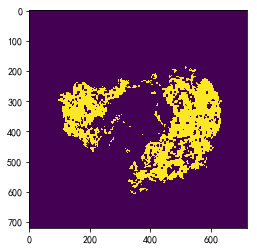

In [41]:
plt.imshow(sig)

In [42]:
np.unique(sig,return_counts=True)

(array([False,  True]), array([450549,  67851]))

In [79]:
colorindex = np.where((restrend[34] > 2.5) | (restrend[34] < -2.5))

In [80]:
sig2000_dis = np.zeros((720,720))
sig2000_dis[colorindex] = sig[colorindex]

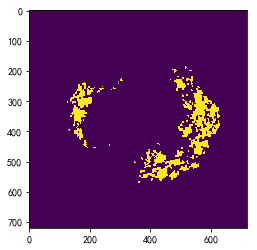

In [81]:
plt.imshow(sig2000_dis)

In [82]:
np.save('obs://ltsa-eemd/significance-test/significance/sig2000_dis.npy',sig2000_dis)

In [55]:
np.unique(sig,return_counts=True)

(array([False,  True]), array([504273,  14127]))

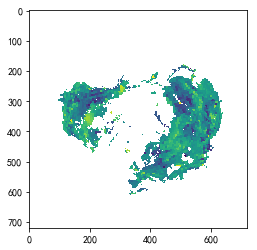

In [54]:
plt.imshow(nor_trend_1973)

In [61]:
np.save('obs://ltsa-eemd/significance-test/significance/sig1973.npy',sig)

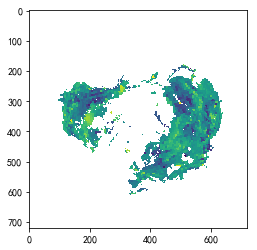

In [60]:
plt.imshow(nor_trend_1973)

In [94]:
a = nor_trend_1973 <= upper & nor_trend_1973 >=lower

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [91]:
a.shape

(720, 720)

In [92]:
np.unique(a,return_counts= True)

(array([False,  True]), array([ 28770, 489630]))

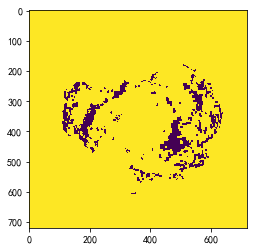

In [93]:
plt.imshow(a)

In [57]:
cv2.blur?